In [18]:
!nvidia-smi

Wed Sep 20 22:42:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [20]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [21]:
from ultralytics import YOLO

from IPython.display import display, Image

In [33]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets



!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API Key")
project = rf.workspace("su-ujhvp").project("nerf_gun-_detection")
dataset = project.version(4).download("yolov8")



mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`

Version export complete for yolov8 format



Extracting Dataset Version Zip to Nerf_gun-_detection-4 in yolov8:: 100%|██████████| 316/316 [00:00<00:00, 4040.41it/s]


In [35]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Nerf_gun-_detection-4/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, 

In [44]:
!ls {HOME}/runs/detect/train5/

args.yaml					     train_batch0.jpg
confusion_matrix.png				     train_batch1.jpg
events.out.tfevents.1695252840.6cb4b7a774d5.27096.0  train_batch2.jpg
F1_curve.png					     train_batch810.jpg
P_curve.png					     train_batch811.jpg
PR_curve.png					     train_batch812.jpg
R_curve.png					     val_batch0_labels.jpg
results.csv					     val_batch0_pred.jpg
results.png					     weights


Validate Custom Model


In [45]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-20 23:50:38.575099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 23:50:39.450480: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Nerf_gun-_detection-4/valid/labels.cache... 6 images, 2 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 4. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a det

In [38]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
video_source = '/content/drive/MyDrive/Yash/Yash.mp4'


# Inference with Custom Model on the video
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source={video_source} save=True


/content
2023-09-20 23:47:33.888662: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 23:47:35.206238: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/750) /content/drive/MyDrive/Yash/Yash.mp4: 384x640 68.8ms
video 1/1 (2/750) /content/drive/MyDrive/Yash/Yash.mp4: 384x640 1 Nerf Gun, 11.1ms
video 1/1 (3/750) /content/drive/MyDrive/Yash/Yash.mp4: 384x640 11.1ms
video 1/1 (4/750) /content/drive/MyDrive/Yash/Yash.mp4: 384x640 11.1ms
video 1/1 (5/750) /content/drive/MyDrive/Yash/Yash.mp4: 384x640 11.1ms
video 1/1 (6

In [41]:

# Specify the path to the processed video
processed_video_path = '/content/runs/detect/predict4/Yash.mp4'

# Specify the destination path in Google Drive
google_drive_destination = '/content/drive/MyDrive/Yash/Yash_5.mp4'

# Copy the processed video to Google Drive
import shutil
shutil.copy(processed_video_path, google_drive_destination)

# Print a message indicating the video has been copied to Google Drive
print(f"Processed video has been copied to: {google_drive_destination}")

Processed video has been copied to: /content/drive/MyDrive/Yash/Yash_5.mp4


/content


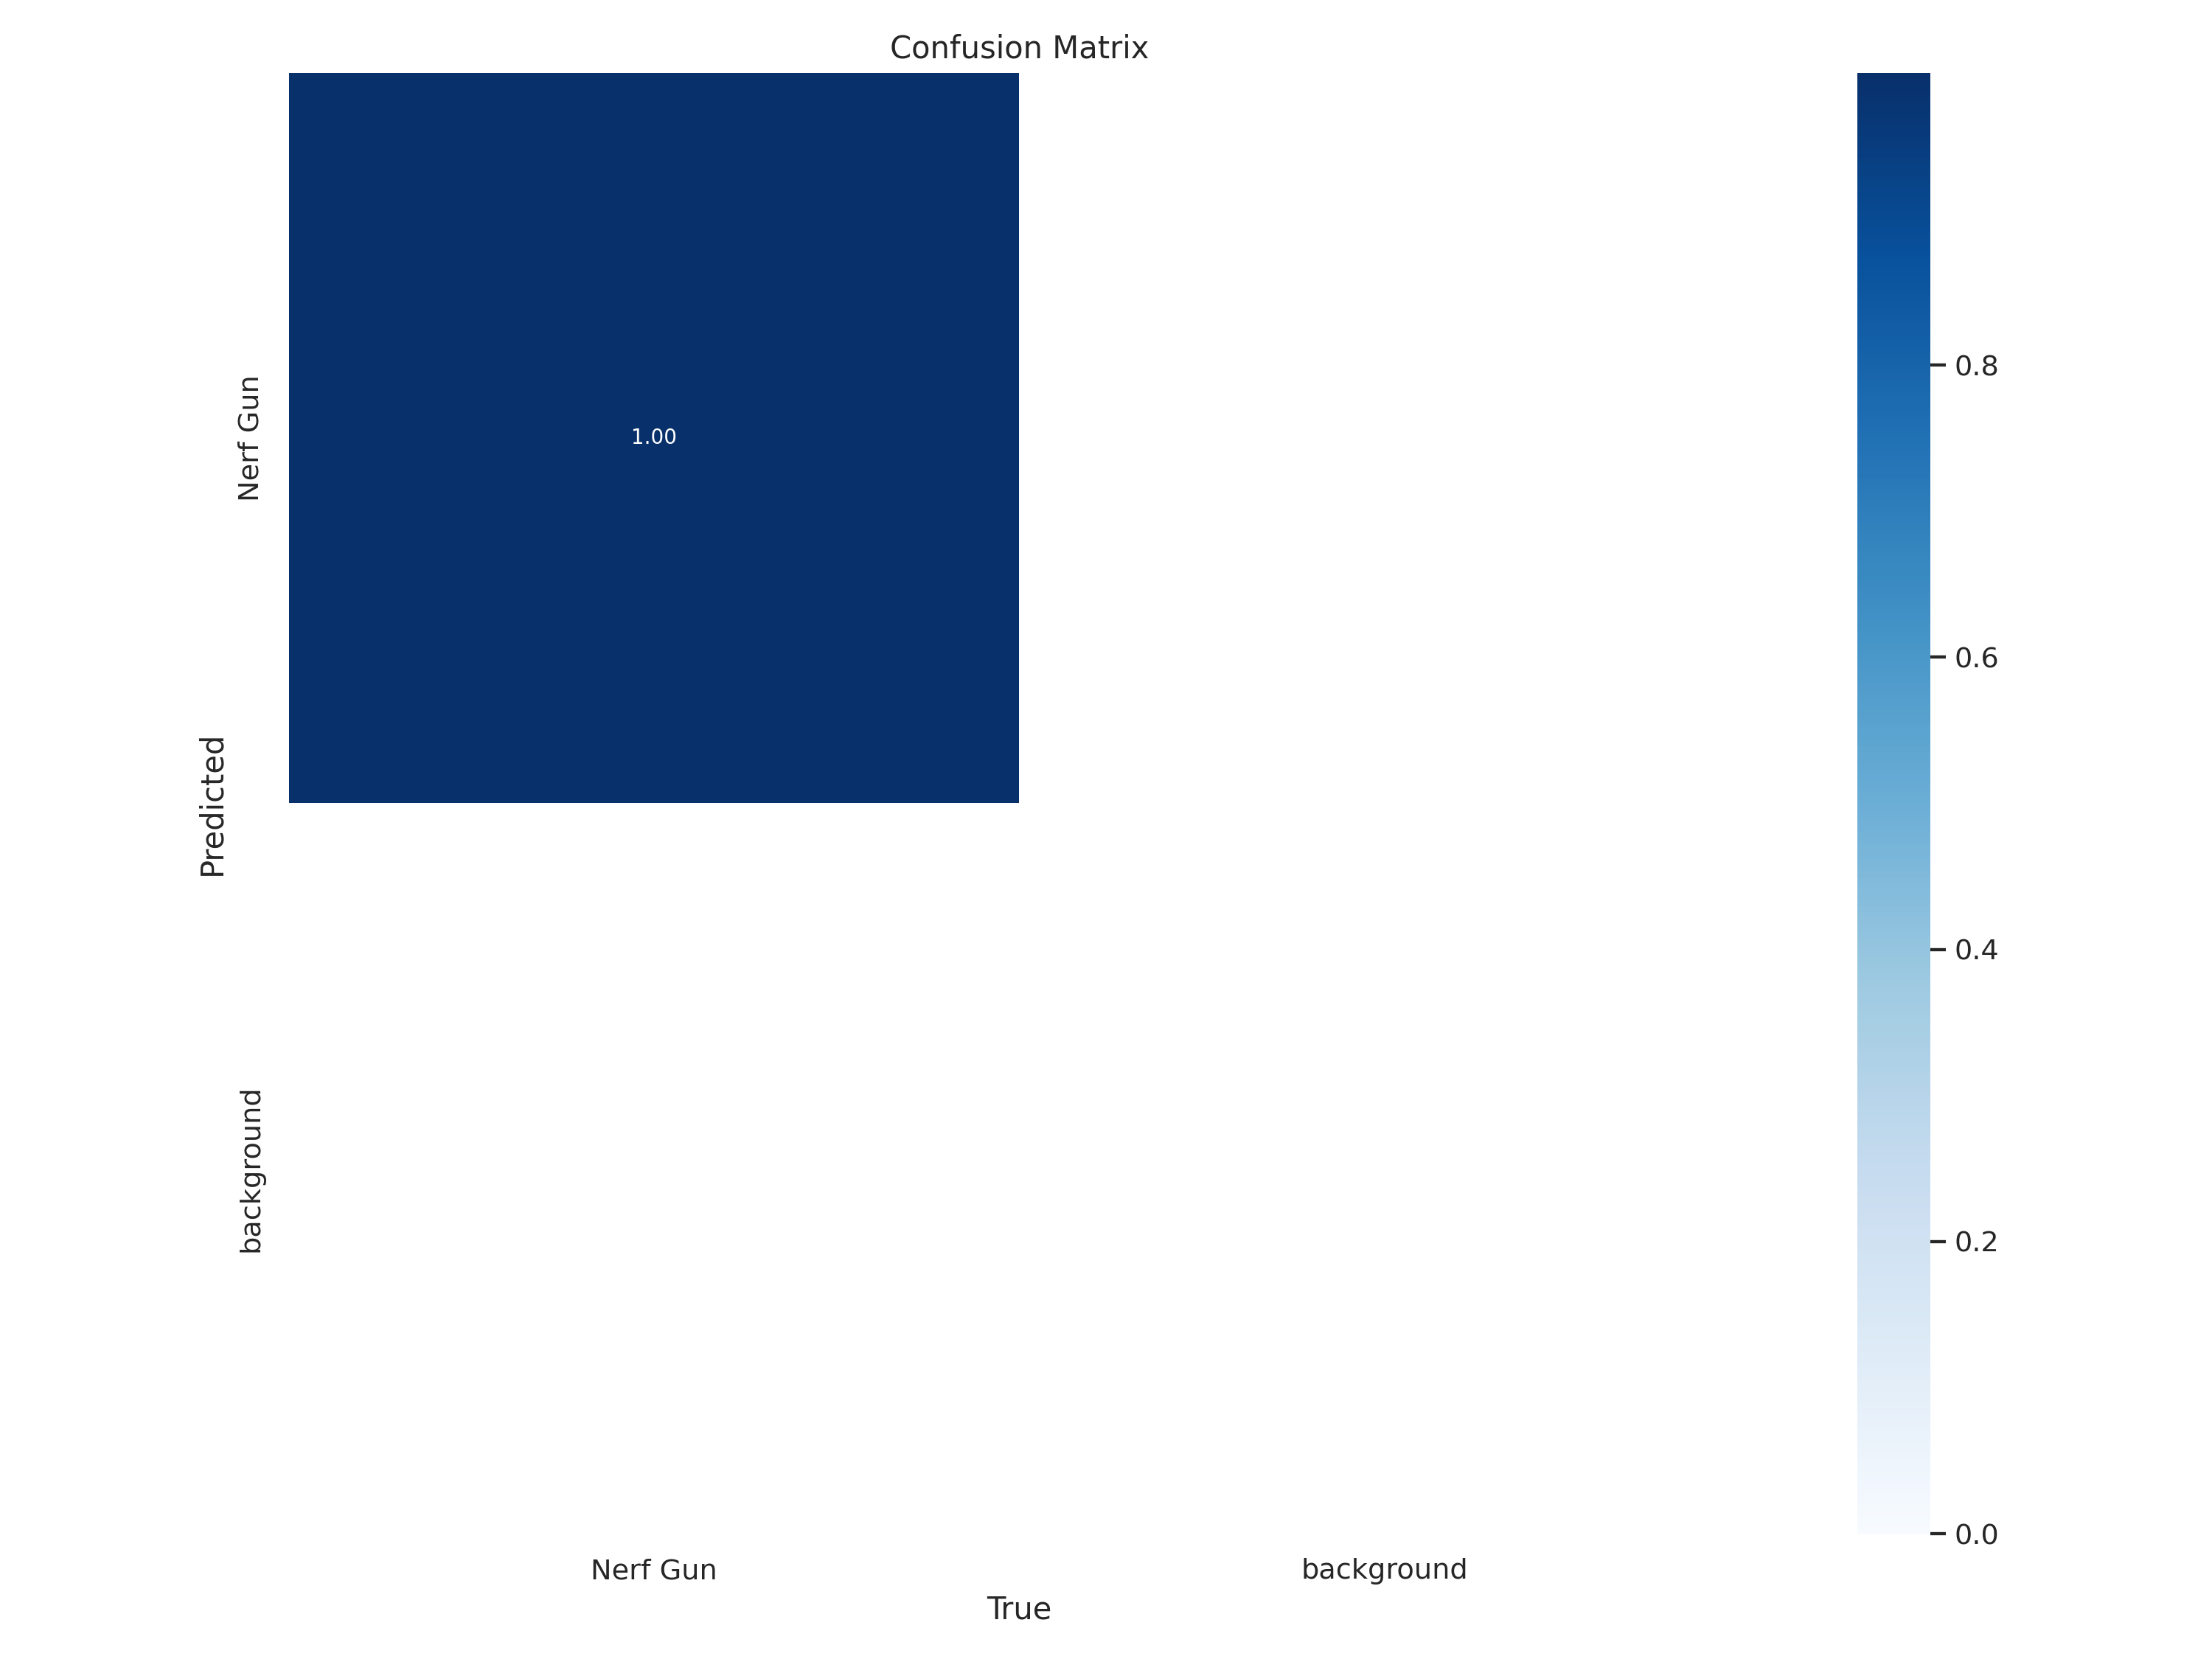

In [46]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

/content


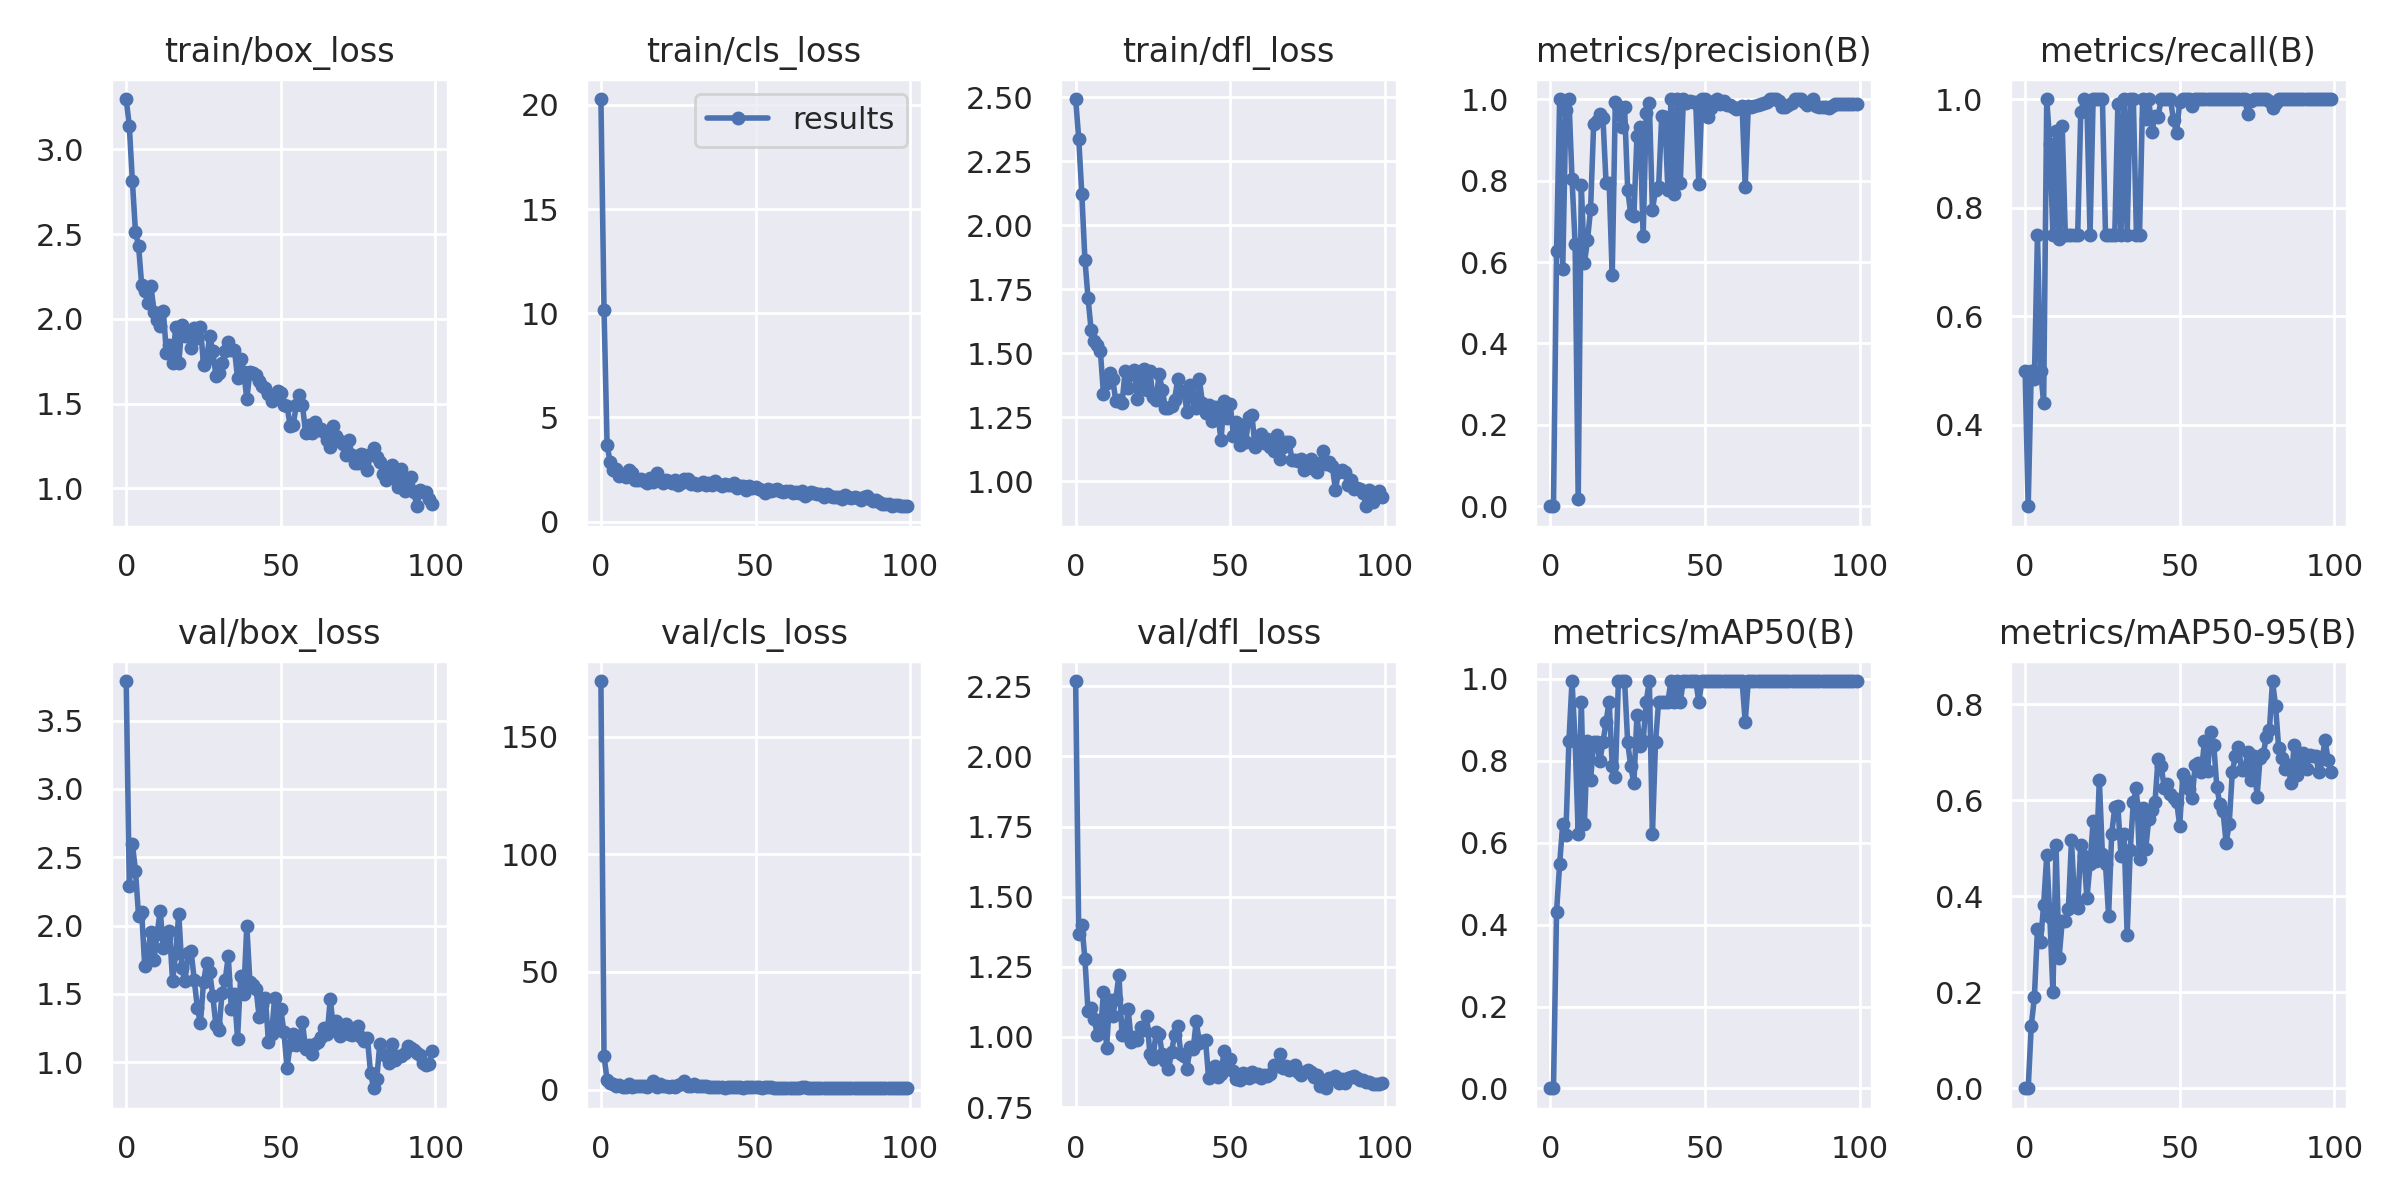

In [47]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/results.png', width=600)

/content


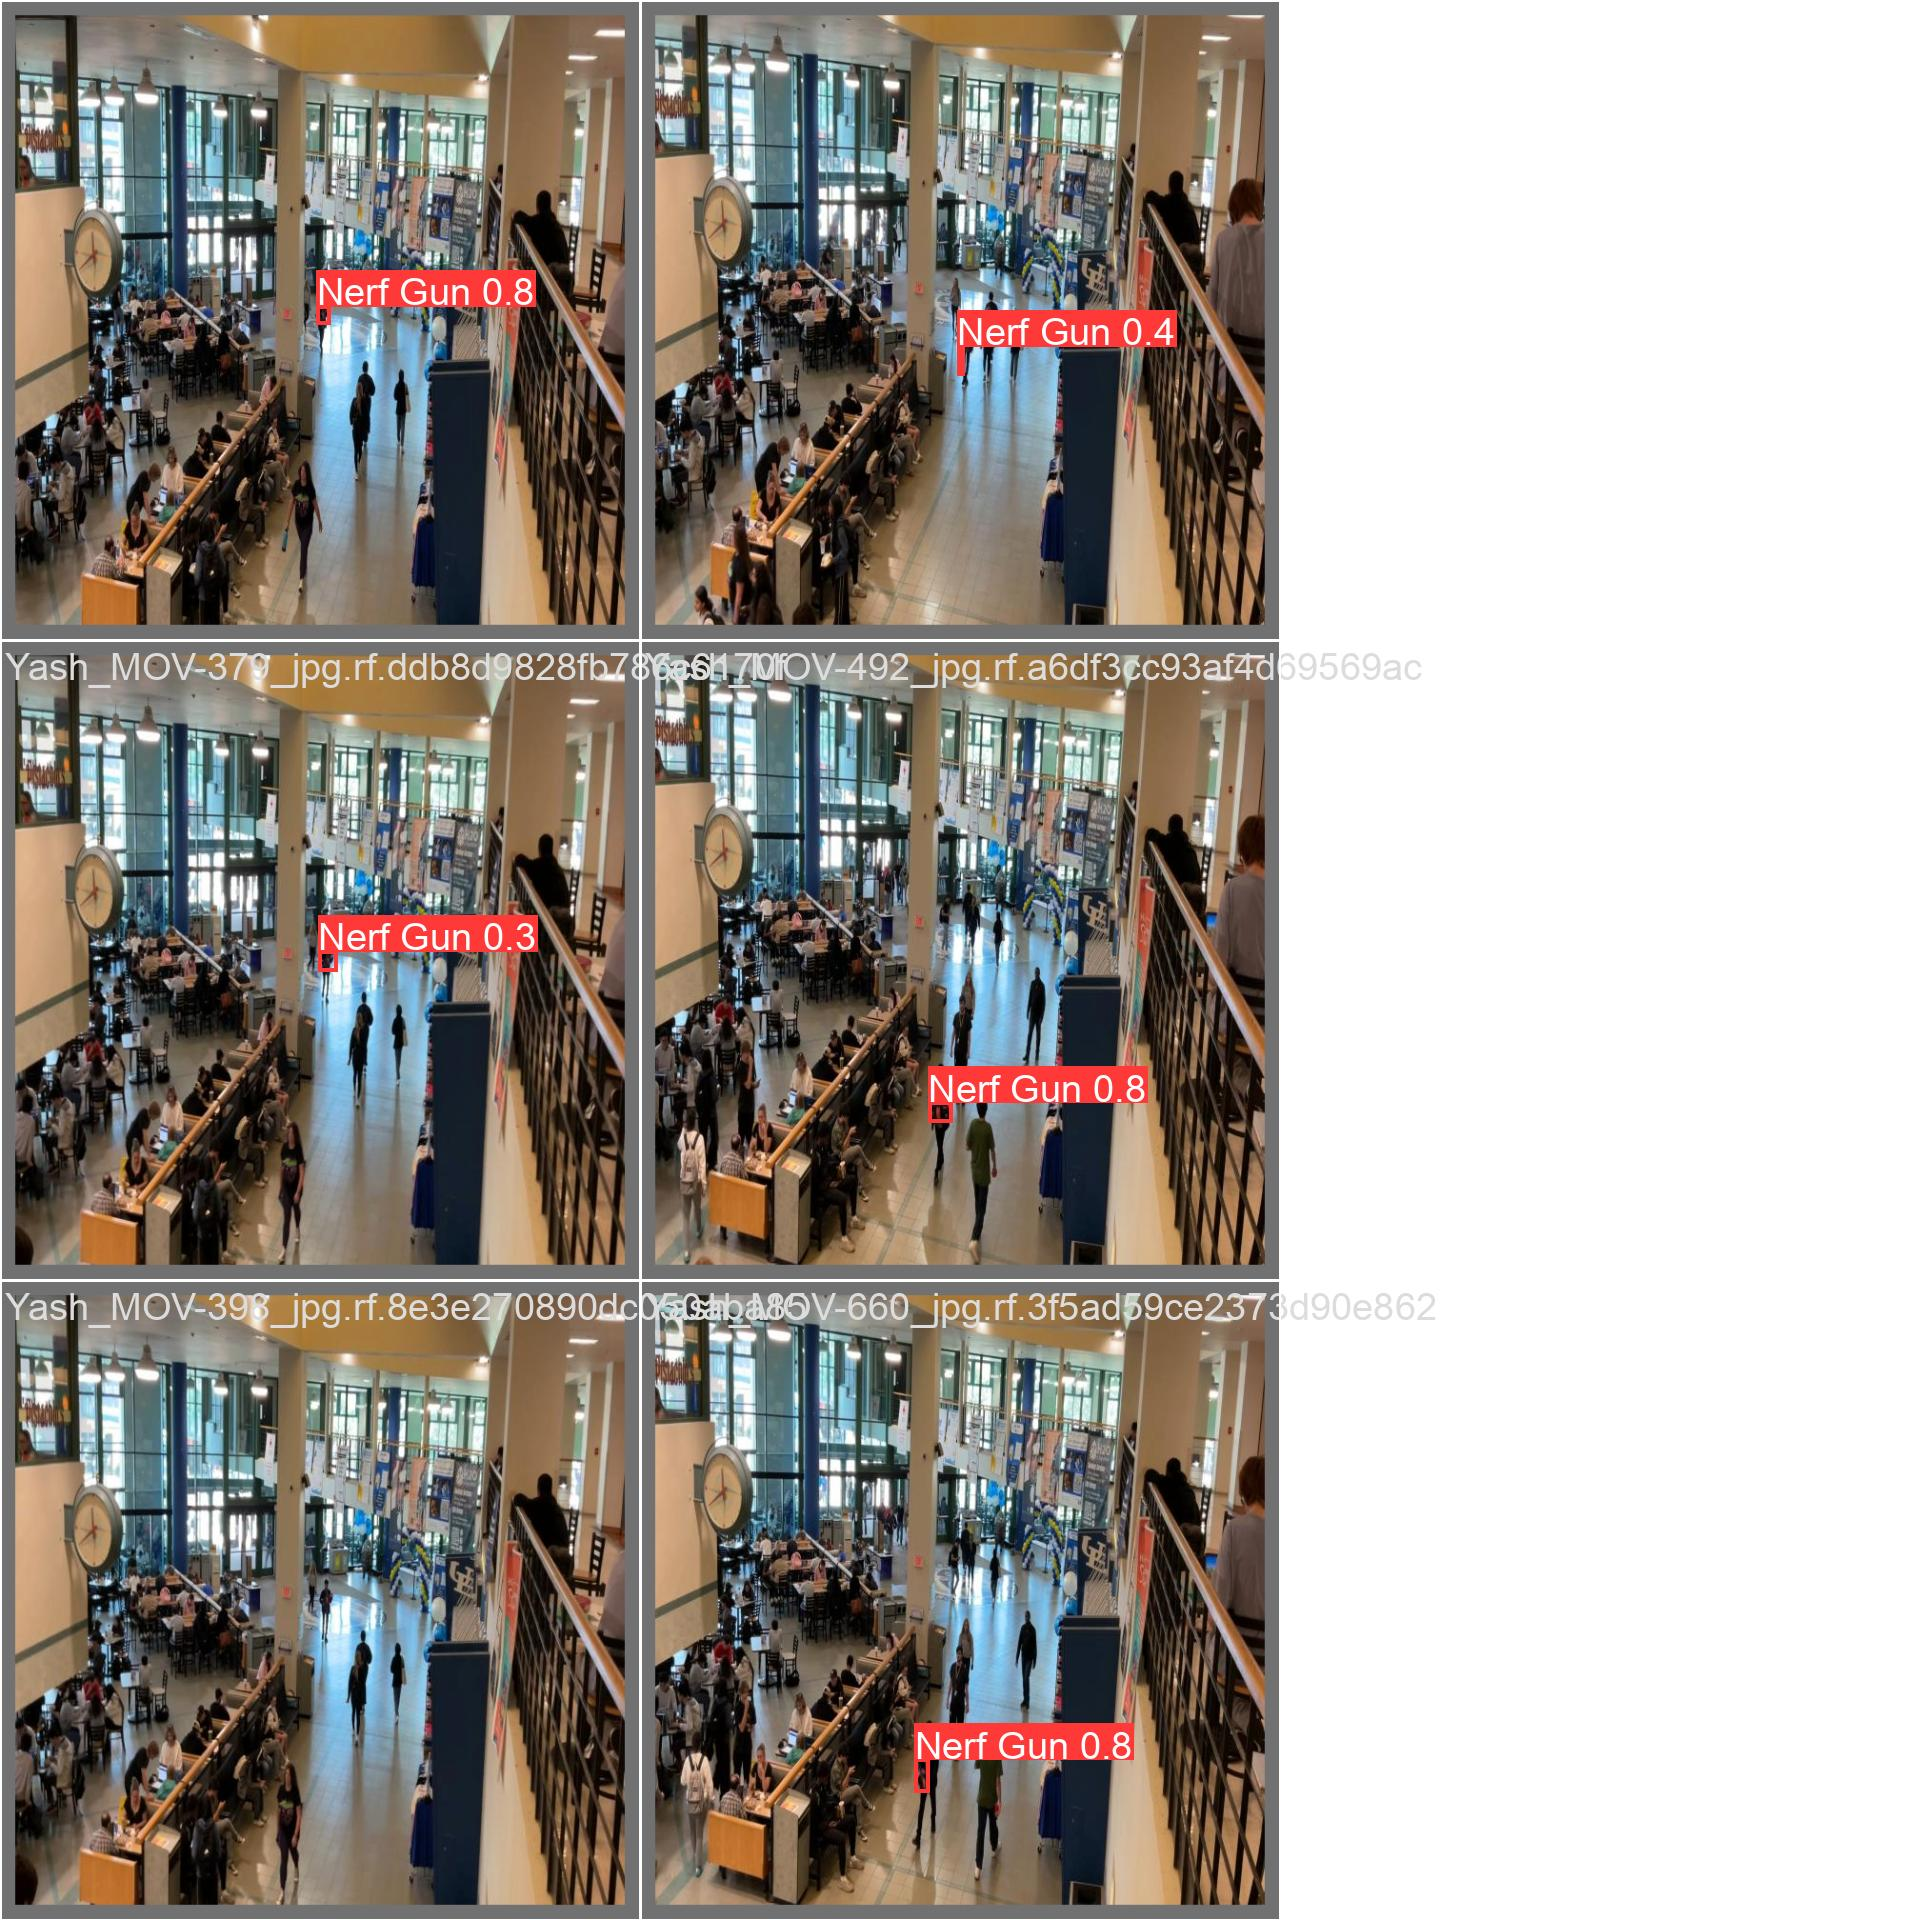

In [48]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/val_batch0_pred.jpg', width=600)